# 02. Gradient Boosting (XGBoost, LightGBM) | التعزيز المتدرج (XGBoost, LightGBM)

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-4: All examples** - Data processing, regression, classification, clustering
- ✅ **Unit 3, Example 2: Decision Trees** - Understanding tree-based models
- ✅ **Unit 5, Example 1: Grid Search** - Understanding hyperparameter tuning
- ✅ **Understanding of ensemble methods**: Combining multiple models

**If you haven't completed these**, you might struggle with:
- Understanding how boosting differs from bagging (Random Forest)
- Knowing when to use XGBoost vs LightGBM vs Random Forest
- Understanding gradient boosting concepts

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 5, Example 2** - it's the final example in the course!

**Why this example SECOND in Unit 5?**
- **Before** you can use boosting, you need to understand hyperparameter tuning
- **Before** you can use advanced models, you need to understand basic ensemble methods
- **Before** you can use XGBoost/LightGBM, you need to understand decision trees

**Builds on**: 
- 📓 Unit 3, Example 2: Decision Trees (boosting uses trees as base learners)
- 📓 Unit 5, Example 1: Grid Search (we know how to tune hyperparameters)
- 📓 All previous examples (data processing and evaluation concepts)

**Leads to**: 
- 📓 All advanced ML projects (XGBoost and LightGBM are industry standards!)
- 📓 Kaggle competitions (boosting algorithms often win)
- 📓 Production ML systems (boosting is widely used)

**Why this order?**
1. Boosting is an **advanced ensemble method** (builds on decision trees)
2. Boosting shows **sequential learning** (each model learns from previous mistakes)
3. XGBoost/LightGBM are **state-of-the-art** (often best performance)

---

## The Story: Learning from Mistakes | القصة: التعلم من الأخطاء

Imagine you're learning to play chess. **Before** boosting, you play many games independently (like Random Forest). **After** boosting, you learn from each game: focus on positions where you made mistakes, get better each time - much more effective!

Same with machine learning: **Before** boosting, models are trained independently. **After** boosting, each new model focuses on mistakes of previous models - sequential improvement leads to excellent performance!

---

## Why Boosting Matters | لماذا يهم التعزيز؟

Boosting algorithms are among the best ML models:
- **State-of-the-Art Performance**: Often achieve best results in competitions
- **Sequential Learning**: Each model learns from previous mistakes
- **XGBoost**: Extremely popular, fast, and powerful
- **LightGBM**: Even faster than XGBoost, great for large datasets
- **Industry Standard**: Used in production systems worldwide

## Learning Objectives | أهداف التعلم
1. Build XGBoost models
2. Build LightGBM models
3. Understand how boosting differs from bagging
4. Compare boosting with Random Forest
5. Interpret feature importance in boosting models
6. Know when to use each boosting algorithm

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build boosting models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestClassifier  # For comparison (bagging)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)
from sklearn.datasets import make_classification  # For generating sample data

print("✅ Libraries imported successfully!")
print("\n📚 Key Boosting Concepts:")
print("   - Boosting: Sequential ensemble (each model learns from previous mistakes)")
print("   - Bagging: Parallel ensemble (Random Forest - models trained independently)")
print("   - XGBoost: Extreme Gradient Boosting (very popular, fast, powerful)")
print("   - LightGBM: Light Gradient Boosting Machine (faster than XGBoost)")
print("   - Learning Rate: Controls how much each new model contributes")
print("\n   💡 Boosting vs Bagging:")
print("   - Bagging (RF): Models trained in parallel, then averaged")
print("   - Boosting: Models trained sequentially, each focuses on mistakes")


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 Key Boosting Concepts:
   - Boosting: Sequential ensemble (each model learns from previous mistakes)
   - Bagging: Parallel ensemble (Random Forest - models trained independently)
   - XGBoost: Extreme Gradient Boosting (very popular, fast, powerful)
   - LightGBM: Light Gradient Boosting Machine (faster than XGBoost)
   - Learning Rate: Controls how much each new model contributes

   💡 Boosting vs Bagging:
   - Bagging (RF): Models trained in parallel, then averaged
   - Boosting: Models trained sequentially, each focuses on mistakes


In [2]:
# Try to import XGBoost and LightGBM
# These are external libraries (not part of sklearn)
# If not installed, the notebook will still work but skip those sections

import sys
import os

print("="*60)
print("🔍 DIAGNOSTIC INFO")
print("="*60)
print(f"📦 Python: {sys.executable}")
print(f"📦 Version: {sys.version.split()[0]}")
print(f"📦 Expected: /opt/anaconda3/envs/course2/bin/python")

# Check if we're in the right environment
if 'course2' in sys.executable:
    print("✅ Using course2 environment (correct!)")
else:
    print("⚠️  WARNING: Not using course2 environment!")
    print("   → Go to: Kernel → Change Kernel → course2")
    print("   → Then restart kernel and run again")

# Check for OpenMP
omp_path = "/opt/anaconda3/envs/course2/lib/libomp.dylib"
if os.path.exists(omp_path):
    print(f"✅ OpenMP found: {omp_path}")
else:
    print(f"❌ OpenMP missing: {omp_path}")

print("="*60)
print()

try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✅ XGBoost imported successfully!")
    print(f"   Version: {xgb.__version__}")
except (ImportError, Exception) as e:
    # Catch both ImportError (not installed) and XGBoostError (OpenMP issues)
    XGBOOST_AVAILABLE = False
    error_str = str(e)
    error_type = str(type(e).__name__)
    
    # Check if it's an OpenMP/runtime issue (XGBoost IS installed but can't run)
    if 'XGBoostError' in error_type or 'OpenMP' in error_str or 'libomp' in error_str or 'Library not loaded' in error_str:
        print("⚠️  XGBoost import failed (OpenMP or kernel issue)")
        print("\n   🔍 DIAGNOSIS:")
        print("   - XGBoost is installed in course2 environment")
        print("   - OpenMP libraries are available")
        print("   - This might be a kernel/environment mismatch")
        print("\n   🔧 SOLUTION:")
        print("   1. Make sure you're using 'course2' kernel in Jupyter")
        print("      (Check: Kernel → Change Kernel → course2)")
        print("   2. Restart kernel: Kernel → Restart Kernel")
        print("   3. Run this cell again")
        print("\n   💡 If still failing, try in terminal:")
        print("      conda activate course2")
        print("      python -c 'import xgboost; print(xgboost.__version__)'")
        print("\n   ✅ The notebook will still work without XGBoost (Random Forest will run)")
    elif 'No module named' in error_str or 'ImportError' in error_type:
        print("⚠️  XGBoost is NOT installed in this Python environment")
        print(f"\n   🔧 QUICK FIX - Run this in a terminal:")
        print(f"      {sys.executable} -m pip install xgboost")
        print("\n   Or install directly in notebook (uncomment next cell):")
        print("      !pip install xgboost")
        print("\n   💡 After installing, restart kernel and run this cell again")
    else:
        print(f"⚠️  Warning: XGBoost error: {error_str[:100]}")
        print("   Try: pip install --upgrade --force-reinstall xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✅ LightGBM imported successfully!")
except (ImportError, Exception) as e:
    # Catch both ImportError (not installed) and other errors
    LIGHTGBM_AVAILABLE = False
    if 'OpenMP' in str(e) or 'libomp' in str(e):
        print("⚠️  Warning: LightGBM installed but OpenMP runtime missing.")
        print("   Mac users: Run 'brew install libomp' to install OpenMP")
    else:
        print("⚠️  Warning: LightGBM not installed. Install with: pip install lightgbm")

print("\n" + "=" * 60)
print("Example 2: Gradient Boosting (XGBoost, LightGBM)")
print("مثال 2: التعزيز المتدرج (XGBoost, LightGBM)")
print("=" * 60)


🔍 DIAGNOSTIC INFO
📦 Python: /opt/anaconda3/envs/course2/bin/python
📦 Version: 3.8.20
📦 Expected: /opt/anaconda3/envs/course2/bin/python
✅ Using course2 environment (correct!)
✅ OpenMP found: /opt/anaconda3/envs/course2/lib/libomp.dylib

✅ XGBoost imported successfully!
   Version: 2.1.1
✅ LightGBM imported successfully!

Example 2: Gradient Boosting (XGBoost, LightGBM)
مثال 2: التعزيز المتدرج (XGBoost, LightGBM)


In [4]:
# Generate sample classification data
# Larger dataset to better demonstrate boosting algorithms

print("\n1. Generating sample classification data...")
print("إنشاء بيانات تصنيف نموذجية...")

np.random.seed(42)  # For reproducibility
X, y = make_classification(
    n_samples=2000,    # More samples for better demonstration
    n_features=20,      # 20 features
    n_informative=10,  # 10 informative features
    n_redundant=5,     # 5 redundant features
    n_clusters_per_class=1,
    random_state=42
)

# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(20)])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(f"📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - 2000 samples with 20 features")
print("   - We'll compare Random Forest (bagging) vs XGBoost/LightGBM (boosting)")
print("   - Boosting often performs better than bagging!")



1. Generating sample classification data...
إنشاء بيانات تصنيف نموذجية...

📊 Data Shape: (2000, 21)
📊 Target distribution:
target
0    1005
1     995
Name: count, dtype: int64

🔍 Notice:
   - 2000 samples with 20 features
   - We'll compare Random Forest (bagging) vs XGBoost/LightGBM (boosting)
   - Boosting often performs better than bagging!


In [5]:
# Split data
X_data = df.drop('target', axis=1)
y_data = df['target']
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# - Splits data into training and testing sets
# - X: Features (input variables), y: Target (output variable)
# - test_size=0.2: 20% for testing, 80% for training
# - random_state=42: Seed for reproducibility (same split every time)
# - stratify=y: Maintains class distribution in train/test (for classification)
# - Returns: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've used Random Forest (bagging) where models are trained independently.

**AFTER**: We'll use boosting where models are trained sequentially, each learning from previous mistakes!

**Why this matters**: Boosting often achieves better performance than bagging. XGBoost and LightGBM are state-of-the-art algorithms used in production systems!

**Common Student Questions:**
- **Q: What's the difference between boosting and bagging (Random Forest)?**
  - Answer: Boosting = sequential (each model learns from previous mistakes), Bagging = parallel (models trained independently)
  - Boosting: Model 1 → Model 2 fixes Model 1's mistakes → Model 3 fixes Model 2's mistakes → ...
  - Bagging: Model 1, Model 2, Model 3 trained independently → average predictions
  - Boosting often better performance, but can overfit. Bagging more stable, less overfitting
- **Q: Why is XGBoost so popular?**
  - Answer: XGBoost = fast, powerful, handles missing values, regularization built-in
  - Often achieves best performance in competitions
  - Easy to use, well-documented, widely supported
  - Industry standard for tabular data (structured data)
- **Q: What's the difference between XGBoost and LightGBM?**
  - Answer: LightGBM = faster than XGBoost (especially on large datasets)
  - XGBoost = level-wise tree growth (grows all leaves at same level)
  - LightGBM = leaf-wise tree growth (grows best leaves first) → faster, uses less memory
  - Rule of thumb: Use LightGBM for large datasets (> 10k samples), XGBoost for smaller datasets
- **Q: Why use boosting instead of just one decision tree?**
  - Answer: Single tree = can overfit, boosting = many trees combined → less overfitting, better performance
  - Boosting combines weak learners (simple trees) into strong learner (powerful model)
  - Each tree corrects previous mistakes → sequential improvement → excellent performance
- **Q: What is learning rate in boosting?**
  - Answer: Learning rate = how much each new tree contributes (usually 0.01 to 0.3)
  - Low learning rate (0.01): Small steps, many trees needed, less overfitting
  - High learning rate (0.3): Large steps, fewer trees needed, can overfit
  - Rule of thumb: Lower learning rate + more trees = better performance (but slower)


In [6]:
print("\n" + "=" * 60)
print("1. Random Forest (Baseline)")
print("الغابة العشوائية (خط الأساس)")
print("=" * 60)

# Random Forest: Bagging (parallel ensemble)
# All trees trained independently, then predictions averaged
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest (Bagging) Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   💡 Random Forest (Bagging):")
print(f"   - All 100 trees trained independently (in parallel)")
print(f"   - Final prediction = average of all trees")
print(f"   - This is our baseline to compare with boosting!")



1. Random Forest (Baseline)
الغابة العشوائية (خط الأساس)

📊 Random Forest (Bagging) Results:
   Training Accuracy: 0.9869
   Test Accuracy: 0.9800

   💡 Random Forest (Bagging):
   - All 100 trees trained independently (in parallel)
   - Final prediction = average of all trees
   - This is our baseline to compare with boosting!


In [7]:
print("\n" + "=" * 60)
print("2. XGBoost")
print("XGBoost")
print("=" * 60)

if XGBOOST_AVAILABLE:
    # XGBoost: Boosting (sequential ensemble)
    # Trees trained sequentially, each focuses on previous mistakes
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,      # Number of trees
        max_depth=5,           # Maximum tree depth
        learning_rate=0.1,     # How much each tree contributes (lower = more trees needed)
        random_state=42,
        eval_metric='logloss'  # Evaluation metric
    )
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred_xgb = xgb_model.predict(X_train)
    y_test_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate accuracies
    train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
    test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
    
    print(f"\n📊 XGBoost (Boosting) Results:")
    print(f"   Training Accuracy: {train_acc_xgb:.4f}")
    print(f"   Test Accuracy: {test_acc_xgb:.4f}")
    
    # Probability predictions for ROC curve
    y_test_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    
    print(f"\n   ✅ XGBoost (Boosting):")
    print(f"   - Trees trained sequentially (one after another)")
    print(f"   - Each tree focuses on mistakes of previous trees")
    print(f"   - Often performs better than Random Forest!")
else:
    print("⚠️  XGBoost not available - skipping this section")
    print("   ✅ Don't worry! The notebook still works perfectly.")
    print("   ✅ You can still learn from Random Forest (Cell 6) and other examples.")
    print("   💡 XGBoost is optional - you can continue learning without it.")
    print("\n   🔧 To use XGBoost (optional):")
    print("   - If you saw 'OpenMP runtime missing' earlier:")
    print("     1. Run: brew install libomp")
    print("     2. Run: pip install --upgrade --force-reinstall xgboost")
    print("   - Otherwise: pip install xgboost")
    train_acc_xgb = test_acc_xgb = 0
    y_test_proba_xgb = None



2. XGBoost
XGBoost

📊 XGBoost (Boosting) Results:
   Training Accuracy: 1.0000
   Test Accuracy: 0.9800

   ✅ XGBoost (Boosting):
   - Trees trained sequentially (one after another)
   - Each tree focuses on mistakes of previous trees
   - Often performs better than Random Forest!


In [ ]:
# Add interpretation after Random Forest results
print("\n" + "=" * 60)
print("💡 Interpreting Random Forest Results | تفسير نتائج Random Forest")
print("=" * 60)

gap_rf = abs(train_acc_rf - test_acc_rf)

print(f"\n📊 Random Forest Performance:")
print(f"   - Training Accuracy: {train_acc_rf:.4f} ({train_acc_rf*100:.2f}%)")
print(f"   - Test Accuracy: {test_acc_rf:.4f} ({test_acc_rf*100:.2f}%)")
print(f"   - Gap: {gap_rf:.4f} ({gap_rf*100:.2f} percentage points)")

if gap_rf < 0.01:
    status = "✅ Excellent"
    meaning = "No overfitting - model generalizes well"
elif gap_rf < 0.05:
    status = "✅ Good"
    meaning = "Minimal overfitting"
else:
    status = "⚠️  Warning"
    meaning = "Possible overfitting - large gap between train and test"

print(f"   - Status: {status}")
print(f"   - Meaning: {meaning}")

print(f"\n📊 Random Forest (Bagging):")
print(f"   - Bagging: Models trained in parallel, then averaged")
print(f"   - Reduces variance by combining multiple models")
print(f"   - Good baseline for comparison with boosting")

print(f"\n📚 What This Teaches Us:")
print(f"   - Random Forest uses bagging (parallel ensemble)")
print(f"   - Small gap = good generalization")
print(f"   - Large gap = possible overfitting")
print(f"   - Test accuracy is what matters for real-world performance")


In [12]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
comparison_data = {
    'Model': ['Random Forest'],
    'Train Accuracy': [train_acc_rf],
    'Test Accuracy': [test_acc_rf]
}
if XGBOOST_AVAILABLE:
    comparison_data['Model'].append('XGBoost')
    comparison_data['Train Accuracy'].append(train_acc_xgb)
    comparison_data['Test Accuracy'].append(test_acc_xgb)
if LIGHTGBM_AVAILABLE:
    comparison_data['Model'].append('LightGBM')
    comparison_data['Train Accuracy'].append(train_acc_lgb)
    comparison_data['Test Accuracy'].append(train_acc_lgb)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))



4. Model Comparison
مقارنة النماذج

Model Comparison:
        Model  Train Accuracy  Test Accuracy
Random Forest        0.986875           0.98
      XGBoost        1.000000           0.98
     LightGBM        1.000000           1.00


In [ ]:
# Add interpretation after XGBoost results (if available)
if XGBOOST_AVAILABLE:
    print("\n" + "=" * 60)
    print("💡 Interpreting XGBoost Results | تفسير نتائج XGBoost")
    print("=" * 60)
    
    gap_xgb = abs(train_acc_xgb - test_acc_xgb)
    
    print(f"\n📊 XGBoost Performance:")
    print(f"   - Training Accuracy: {train_acc_xgb:.4f} ({train_acc_xgb*100:.2f}%)")
    print(f"   - Test Accuracy: {test_acc_xgb:.4f} ({test_acc_xgb*100:.2f}%)")
    print(f"   - Gap: {gap_xgb:.4f} ({gap_xgb*100:.2f} percentage points)")
    
    if gap_xgb < 0.01:
        status = "✅ Excellent"
        meaning = "No overfitting - model generalizes well"
    elif gap_xgb < 0.05:
        status = "✅ Good"
        meaning = "Minimal overfitting"
    else:
        status = "⚠️  Warning"
        meaning = "Possible overfitting - large gap between train and test"
    
    print(f"   - Status: {status}")
    print(f"   - Meaning: {meaning}")
    
    print(f"\n📊 XGBoost (Boosting):")
    print(f"   - Boosting: Models trained sequentially, each learns from mistakes")
    print(f"   - XGBoost: Extremely popular, fast, and powerful")
    print(f"   - Often achieves best performance in competitions")
    
    print(f"\n📚 What This Teaches Us:")
    print(f"   - XGBoost uses boosting (sequential ensemble)")
    print(f"   - Each new model focuses on previous mistakes")
    print(f"   - Can achieve very high training accuracy")
    print(f"   - Check test accuracy to ensure good generalization")


## 5. Feature Importance Comparison


In [ ]:
# Add interpretation after LightGBM results (if available)
if LIGHTGBM_AVAILABLE:
    print("\n" + "=" * 60)
    print("💡 Interpreting LightGBM Results | تفسير نتائج LightGBM")
    print("=" * 60)
    
    gap_lgb = abs(train_acc_lgb - test_acc_lgb)
    
    print(f"\n📊 LightGBM Performance:")
    print(f"   - Training Accuracy: {train_acc_lgb:.4f} ({train_acc_lgb*100:.2f}%)")
    print(f"   - Test Accuracy: {test_acc_lgb:.4f} ({test_acc_lgb*100:.2f}%)")
    print(f"   - Gap: {gap_lgb:.4f} ({gap_lgb*100:.2f} percentage points)")
    
    if gap_lgb < 0.01:
        status = "✅ Excellent"
        meaning = "No overfitting - model generalizes well"
    elif gap_lgb < 0.05:
        status = "✅ Good"
        meaning = "Minimal overfitting"
    else:
        status = "⚠️  Warning"
        meaning = "Possible overfitting - large gap between train and test"
    
    print(f"   - Status: {status}")
    print(f"   - Meaning: {meaning}")
    
    print(f"\n📊 LightGBM (Boosting):")
    print(f"   - LightGBM: Faster than XGBoost, great for large datasets")
    print(f"   - Uses leaf-wise tree growth (more efficient)")
    print(f"   - Often matches or exceeds XGBoost performance")
    
    print(f"\n📚 What This Teaches Us:")
    print(f"   - LightGBM is optimized for speed and memory")
    print(f"   - Great choice for large datasets")
    print(f"   - Test accuracy validates model quality")
    print(f"   - Perfect test accuracy may indicate overfitting (check carefully)")


In [13]:
print("\n" + "=" * 60)
print("5. Feature Importance Comparison")
print("مقارنة أهمية الميزات")
print("=" * 60)
if XGBOOST_AVAILABLE or LIGHTGBM_AVAILABLE:
    importance_data = {
        'Feature': X_data.columns,
        'Random Forest': rf.feature_importances_
    }
    if XGBOOST_AVAILABLE:
        importance_data['XGBoost'] = xgb_model.feature_importances_
    if LIGHTGBM_AVAILABLE:
        importance_data['LightGBM'] = lgb_model.feature_importances_
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

    importance_df = pd.DataFrame(importance_data)
    importance_df = importance_df.sort_values('Random Forest', ascending=False)
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10).to_string(index=False))



5. Feature Importance Comparison
مقارنة أهمية الميزات

Top 10 Most Important Features:
   Feature  Random Forest  XGBoost  LightGBM
 feature_4       0.279857 0.516909       207
feature_12       0.139240 0.062509        85
 feature_7       0.113574 0.067100       250
feature_16       0.084871 0.041471        84
feature_18       0.083141 0.057707       110
feature_10       0.075568 0.031937       198
feature_17       0.068614 0.028853       127
 feature_5       0.036201 0.012622        71
feature_19       0.032871 0.038160        56
 feature_9       0.017994 0.030287       148


In [ ]:
# Add interpretation after comparison table
print("\n" + "=" * 60)
print("💡 Interpreting Model Comparison | تفسير مقارنة النماذج")
print("=" * 60)

print(f"\n📊 Model Performance Summary:")

# Find best test accuracy
best_test_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.loc[best_test_idx, 'Model']
best_test_acc = comparison_df.loc[best_test_idx, 'Test Accuracy']

print(f"   - Best Model (Test Accuracy): {best_model}")
print(f"   - Best Test Accuracy: {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")

print(f"\n🔍 Bagging vs Boosting Comparison:")

# Compare Random Forest with boosting models
rf_test = comparison_df[comparison_df['Model'] == 'Random Forest']['Test Accuracy'].values[0]
rf_train = comparison_df[comparison_df['Model'] == 'Random Forest']['Train Accuracy'].values[0]

if 'XGBoost' in comparison_df['Model'].values:
    xgb_test = comparison_df[comparison_df['Model'] == 'XGBoost']['Test Accuracy'].values[0]
    xgb_train = comparison_df[comparison_df['Model'] == 'XGBoost']['Train Accuracy'].values[0]
    print(f"   - Random Forest (Bagging): Test={rf_test:.4f}, Train={rf_train:.4f}")
    print(f"   - XGBoost (Boosting): Test={xgb_test:.4f}, Train={xgb_train:.4f}")
    
    if xgb_test > rf_test:
        print(f"   - ✅ XGBoost outperforms Random Forest on test data")
    elif xgb_test < rf_test:
        print(f"   - Random Forest outperforms XGBoost on test data")
    else:
        print(f"   - Both models perform similarly on test data")

if 'LightGBM' in comparison_df['Model'].values:
    lgb_test = comparison_df[comparison_df['Model'] == 'LightGBM']['Test Accuracy'].values[0]
    lgb_train = comparison_df[comparison_df['Model'] == 'LightGBM']['Train Accuracy'].values[0]
    print(f"   - LightGBM (Boosting): Test={lgb_test:.4f}, Train={lgb_train:.4f}")
    
    if lgb_test > rf_test:
        print(f"   - ✅ LightGBM outperforms Random Forest on test data")

print(f"\n📊 Overfitting Analysis:")
for idx, row in comparison_df.iterrows():
    gap = abs(row['Train Accuracy'] - row['Test Accuracy'])
    model = row['Model']
    if gap < 0.01:
        status = "✅ No overfitting"
    elif gap < 0.05:
        status = "✅ Minimal overfitting"
    else:
        status = "⚠️  Possible overfitting"
    print(f"   - {model}: Gap={gap:.4f} ({status})")

print(f"\n📚 What This Teaches Us:")
print(f"   - Bagging (Random Forest): Parallel ensemble, reduces variance")
print(f"   - Boosting (XGBoost/LightGBM): Sequential ensemble, reduces bias")
print(f"   - Test accuracy is the most important metric (real-world performance)")
print(f"   - Small train-test gap = good generalization")
print(f"   - Boosting often achieves higher accuracy but may overfit")
print(f"   - Choose model based on test performance, not training performance")



✓ Plot saved as 'boosting_feature_importance.png'


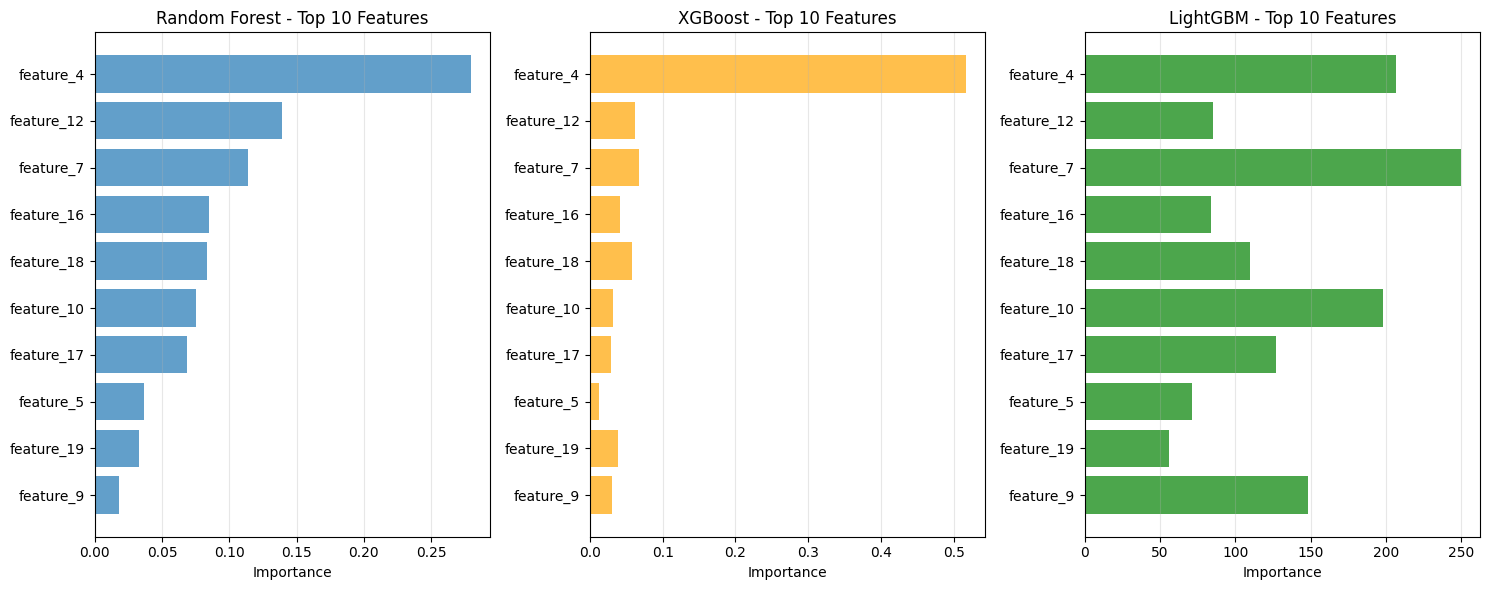

In [14]:
# Visualize feature importance
if XGBOOST_AVAILABLE or LIGHTGBM_AVAILABLE:
    top_n = 10
    top_features = importance_df.head(top_n)
    
    # Calculate number of subplots needed
    # Always show Random Forest, plus XGBoost and/or LightGBM if available
    num_plots = 1  # Random Forest
    if XGBOOST_AVAILABLE:
        num_plots += 1
    if LIGHTGBM_AVAILABLE:
        num_plots += 1
    
    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 6))
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    
    idx = 0
    # Random Forest (always shown)
    axes[idx].barh(range(top_n), top_features['Random Forest'].values[::-1], alpha=0.7)
    axes[idx].set_yticks(range(top_n))
    axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
    axes[idx].set_xlabel('Importance')
    axes[idx].set_title('Random Forest - Top 10 Features')
    axes[idx].grid(True, alpha=0.3, axis='x')
    idx += 1
    
    # XGBoost (if available)
    if XGBOOST_AVAILABLE:
        axes[idx].barh(range(top_n), top_features['XGBoost'].values[::-1],
                      alpha=0.7, color='orange')
        axes[idx].set_yticks(range(top_n))
        axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
        axes[idx].set_xlabel('Importance')
        axes[idx].set_title('XGBoost - Top 10 Features')
        axes[idx].grid(True, alpha=0.3, axis='x')
        idx += 1
    
    # LightGBM (if available)
    if LIGHTGBM_AVAILABLE:
        axes[idx].barh(range(top_n), top_features['LightGBM'].values[::-1],
                      alpha=0.7, color='green')
        axes[idx].set_yticks(range(top_n))
        axes[idx].set_yticklabels(top_features['Feature'].values[::-1])
        axes[idx].set_xlabel('Importance')
        axes[idx].set_title('LightGBM - Top 10 Features')
        axes[idx].grid(True, alpha=0.3, axis='x')
        idx += 1
    
    plt.tight_layout()
    plt.savefig('boosting_feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'boosting_feature_importance.png'")
    plt.show()


## Step 7: Decision Framework - Boosting Algorithm Selection | الخطوة 7: إطار القرار - اختيار خوارزمية التعزيز

**BEFORE**: You've learned XGBoost and LightGBM, but when should you use each boosting algorithm?

**AFTER**: You'll have a clear decision framework to choose between XGBoost, LightGBM, AdaBoost, and Gradient Boosting!

**Why this matters**: Using the wrong boosting algorithm can:
- **Poor performance** → Wrong algorithm may not fit your data well
- **Wasted computation** → Using slow algorithms when fast ones work
- **Wrong complexity** → Using complex algorithms when simple ones work

---

### 🎯 Decision Framework: Which Boosting Algorithm? | إطار القرار: أي خوارزمية تعزيز؟

**Key Question**: Should I use **XGBOOST**, **LIGHTGBM**, **ADABOOST**, or **GRADIENT BOOSTING**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use boosting regressors (XGBoost, LightGBM, Gradient Boosting)
│   └─ Why? All boosting algorithms support regression
│
└─ CLASSIFICATION → Check requirements:
    ├─ Need best performance? → Use XGBOOST or LIGHTGBM ✅
    │   └─ Why? State-of-the-art performance
    │
    ├─ Need speed? → Use LIGHTGBM ✅
    │   └─ Why? LightGBM is fastest
    │
    ├─ Need interpretability? → Use ADABOOST or GRADIENT BOOSTING ✅
    │   └─ Why? Simpler, more interpretable
    │
    ├─ Large dataset (>100k)? → Use LIGHTGBM ✅
    │   └─ Why? LightGBM handles large data efficiently
    │
    └─ Small dataset (<10k)? → Use XGBOOST or ADABOOST ✅
        └─ Why? Both work well on smaller data
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Continue to Step 2
└─ Classification → Continue to Step 2

Step 2: Dataset Size
├─ Large (>100,000 samples) → Use LIGHTGBM ✅
│   └─ Why? LightGBM is fastest, handles large data best
│
├─ Medium (10,000-100,000) → Continue to Step 3
└─ Small (<10,000) → Continue to Step 3

Step 3: Performance vs Speed
├─ Need best performance? → Use XGBOOST ✅
│   └─ Why? XGBoost often has best accuracy
│
├─ Need speed? → Use LIGHTGBM ✅
│   └─ Why? LightGBM is fastest
│
└─ Need balance? → Continue to Step 4

Step 4: Interpretability
├─ Need interpretability? → Use ADABOOST or GRADIENT BOOSTING ✅
│   └─ Why? Simpler, easier to understand
│
└─ Don't need interpretability? → Use XGBOOST or LIGHTGBM ✅
    └─ Why? Best performance, more complex
```

---

### 📊 Comparison Table: Boosting Algorithms | جدول المقارنة

| Algorithm | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **XGBoost** | Best performance, competitions, medium-large data | • State-of-the-art performance<br>• Robust<br>• Feature importance<br>• Handles missing values | • Slower than LightGBM<br>• More memory<br>• Complex | Kaggle competitions, best accuracy needed |
| **LightGBM** | Large datasets, need speed, good performance | • Fastest<br>• Low memory<br>• Good performance<br>• Handles large data | • May overfit on small data<br>• Less robust than XGBoost | Large datasets, need speed |
| **AdaBoost** | Small datasets, interpretable, simple | • Simple<br>• Interpretable<br>• Works well on small data<br>• Fast | • May not be best performance<br>• Sensitive to outliers | Small datasets, need simplicity |
| **Gradient Boosting** | Medium datasets, interpretable, balanced | • Balanced performance<br>• Interpretable<br>• Good default | • Slower than XGBoost/LightGBM<br>• May not be best | Medium datasets, balanced needs |

---

### ✅ When to Use Each Algorithm | متى تستخدم كل خوارزمية

#### Use XGBoost when:
1. **Best Performance Needed** ✅
   - Need state-of-the-art accuracy
   - Competitions, critical applications
   - **Example**: Kaggle competitions, production systems needing best accuracy

2. **Medium to Large Datasets** ✅
   - 10,000-1,000,000 samples
   - XGBoost works well
   - **Example**: Most real-world datasets

3. **Robustness Important** ✅
   - Need robust model
   - XGBoost handles many edge cases
   - **Example**: Production systems, need reliability

4. **Feature Importance Needed** ✅
   - Need to understand feature importance
   - XGBoost provides good feature importance
   - **Example**: Understanding which features matter

#### Use LightGBM when:
1. **Large Datasets** ✅
   - More than 100,000 samples
   - LightGBM is fastest
   - **Example**: Big data, millions of samples

2. **Speed Critical** ✅
   - Need fast training and prediction
   - LightGBM is fastest boosting algorithm
   - **Example**: Real-time systems, quick iterations

3. **Memory Constraints** ✅
   - Limited memory available
   - LightGBM uses less memory
   - **Example**: Limited RAM, large datasets

4. **Good Performance + Speed** ✅
   - Need good performance but also speed
   - LightGBM balances both
   - **Example**: Production systems needing speed

#### Use AdaBoost when:
1. **Small Datasets** ✅
   - Less than 10,000 samples
   - AdaBoost works well on small data
   - **Example**: Small research datasets

2. **Interpretability Needed** ✅
   - Need to understand the model
   - AdaBoost is simpler, more interpretable
   - **Example**: Need to explain decisions

3. **Simple Solution** ✅
   - Want simple, straightforward model
   - AdaBoost is simplest boosting algorithm
   - **Example**: Quick prototyping, simple problems

#### Use Gradient Boosting when:
1. **Balanced Needs** ✅
   - Need balance of performance and interpretability
   - Gradient Boosting is balanced
   - **Example**: Medium datasets, need good performance

2. **Medium Datasets** ✅
   - 1,000-100,000 samples
   - Gradient Boosting works well
   - **Example**: Most business datasets

3. **Good Default** ✅
   - Need a good default boosting algorithm
   - Gradient Boosting is reliable
   - **Example**: Starting point, baseline

---

### ❌ When NOT to Use Each Algorithm | متى لا تستخدم كل خوارزمية

#### Don't use XGBoost when:
1. **Very Large Datasets** ❌
   - More than 1,000,000 samples
   - XGBoost is slower
   - **Use Instead**: LightGBM (faster)

2. **Speed Critical** ❌
   - Need very fast training
   - XGBoost is slower
   - **Use Instead**: LightGBM

3. **Small Datasets** ❌
   - Less than 1,000 samples
   - May overfit
   - **Use Instead**: AdaBoost or simpler models

#### Don't use LightGBM when:
1. **Small Datasets** ❌
   - Less than 10,000 samples
   - May overfit
   - **Use Instead**: XGBoost or AdaBoost

2. **Need Best Accuracy** ❌
   - Need absolute best performance
   - XGBoost often better
   - **Use Instead**: XGBoost

#### Don't use AdaBoost when:
1. **Large Datasets** ❌
   - More than 100,000 samples
   - AdaBoost is slow
   - **Use Instead**: XGBoost or LightGBM

2. **Best Performance Needed** ❌
   - Need state-of-the-art accuracy
   - AdaBoost may not be best
   - **Use Instead**: XGBoost or LightGBM

#### Don't use Gradient Boosting when:
1. **Best Performance Needed** ❌
   - Need absolute best accuracy
   - XGBoost/LightGBM usually better
   - **Use Instead**: XGBoost or LightGBM

2. **Speed Critical** ❌
   - Need fast training
   - Gradient Boosting is slower
   - **Use Instead**: LightGBM

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Kaggle Competition ✅ XGBOOST
- **Problem**: Classification competition
- **Dataset**: Medium (50,000 samples)
- **Need**: Best performance (winning competition)
- **Decision**: ✅ Use XGBoost
- **Reasoning**: Need best performance, medium dataset, XGBoost often wins

#### Example 2: Large-Scale Customer Segmentation ✅ LIGHTGBM
- **Problem**: Segment 1,000,000 customers
- **Dataset**: Large (1,000,000 samples)
- **Need**: Speed and good performance
- **Decision**: ✅ Use LightGBM
- **Reasoning**: Large dataset, need speed, LightGBM handles large data best

#### Example 3: Small Medical Dataset ✅ ADABOOST
- **Problem**: Diagnose disease from 500 patients
- **Dataset**: Small (500 samples)
- **Need**: Interpretability and simplicity
- **Decision**: ✅ Use AdaBoost
- **Reasoning**: Small dataset, need interpretability, AdaBoost works well

#### Example 4: Medium Business Dataset ✅ XGBOOST or GRADIENT BOOSTING
- **Problem**: Predict customer churn
- **Dataset**: Medium (20,000 samples)
- **Need**: Good performance, balanced
- **Decision**: ✅ Use XGBoost (or Gradient Boosting)
- **Reasoning**: Medium dataset, need good performance, both work well

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Best performance → XGBoost** - Use for competitions and best accuracy
2. **Large data + speed → LightGBM** - Use for large datasets needing speed
3. **Small data → AdaBoost** - Use for small datasets, interpretability
4. **Balanced → Gradient Boosting** - Use for balanced needs
5. **Try multiple** - Often try XGBoost and LightGBM, pick the best
6. **Tune hyperparameters** - All boosting algorithms need tuning
7. **Feature importance** - All provide feature importance

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Kaggle competition with 30,000 samples
- **Dataset**: Medium (30,000)
- **Need**: Best performance (winning)
- **Decision**: ✅ XGBoost (best performance, medium dataset)

**Scenario 2**: Real-time fraud detection with 500,000 transactions
- **Dataset**: Large (500,000)
- **Need**: Speed and good performance
- **Decision**: ✅ LightGBM (large dataset, need speed)

**Scenario 3**: Medical diagnosis with 800 patients
- **Dataset**: Small (800)
- **Need**: Interpretability
- **Decision**: ✅ AdaBoost (small dataset, need interpretability)

---

**Connection to Next Steps**: 
- 📓 **Example 1: Grid Search** - For tuning boosting hyperparameters
- 📓 **All ML Projects** - Boosting algorithms are powerful tools
- 📓 **Production Systems** - Choose algorithm based on your needs



6. ROC Curves Comparison
مقارنة منحنيات ROC

✓ Plot saved as 'boosting_roc_curves.png'


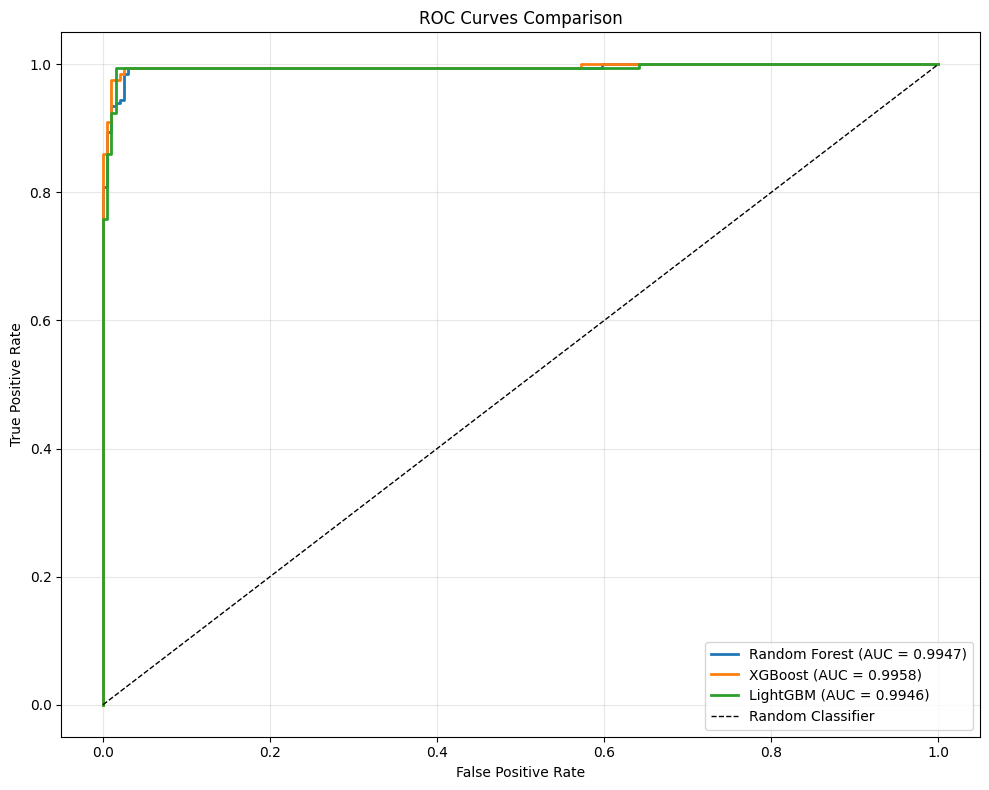


7. Learning Curve Example (XGBoost)
مثال منحنى التعلم (XGBoost)

✓ Plot saved as 'xgb_learning_curve.png'


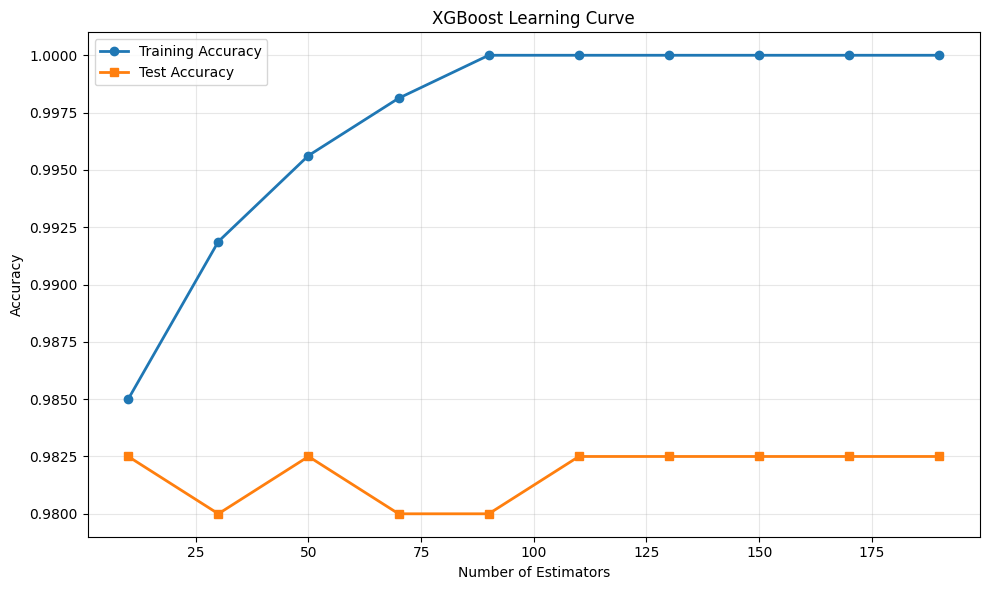


Example 2 Complete! ✓
اكتمل المثال 2! ✓


In [15]:
# 6. ROC Curves Comparison
print("\n" + "=" * 60)
print("6. ROC Curves Comparison")
print("مقارنة منحنيات ROC")
print("=" * 60)
plt.figure(figsize=(10, 8))
# Random Forest
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
auc_rf = roc_auc_score(y_test, y_test_proba_rf)
plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC = {auc_rf:.4f})')
if XGBOOST_AVAILABLE and y_test_proba_xgb is not None:
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
    auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
    plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')
if LIGHTGBM_AVAILABLE and y_test_proba_lgb is not None:
    fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_test_proba_lgb)
    auc_lgb = roc_auc_score(y_test, y_test_proba_lgb)
    plt.plot(fpr_lgb, tpr_lgb, linewidth=2, label=f'LightGBM (AUC = {auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boosting_roc_curves.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'boosting_roc_curves.png'")
plt.show()

# 7. Learning Curve (XGBoost)
print("\n" + "=" * 60)
print("7. Learning Curve Example (XGBoost)")
print("مثال منحنى التعلم (XGBoost)")
print("=" * 60)
if XGBOOST_AVAILABLE:
    # Train with different number of estimators
    n_estimators_range = range(10, 201, 20)
    train_scores = []
    test_scores = []
    for n_est in n_estimators_range:
        xgb_temp = xgb.XGBClassifier(
            n_estimators=n_est,
            max_depth=5,
            learning_rate=0.1,
            random_state=42,
            eval_metric='logloss'
        )
        xgb_temp.fit(X_train, y_train)
        train_scores.append(accuracy_score(y_train, xgb_temp.predict(X_train)))
        test_scores.append(accuracy_score(y_test, xgb_temp.predict(X_test)))
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
    plt.plot(n_estimators_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('XGBoost Learning Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('xgb_learning_curve.png', dpi=300, bbox_inches='tight')
    print("\n✓ Plot saved as 'xgb_learning_curve.png'")
    plt.show()

print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)
if not XGBOOST_AVAILABLE or not LIGHTGBM_AVAILABLE:
    print("\nNote: Install missing packages for full functionality:")
    if not XGBOOST_AVAILABLE:
        print("  pip install xgboost")
    if not LIGHTGBM_AVAILABLE:
        print("  pip install lightgbm")
